In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as random
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
df = pd.read_csv('iris.data', encoding='utf-8', 
                 names=['sepal length', 'sepal width', 'petal length', 'petal width', 'variety'])

### Scatter Plots

In [3]:
setosa = df[df['variety']=='Iris-setosa']
versicolor = df[df['variety']=='Iris-versicolor']
virginica = df[df['variety']=='Iris-virginica']

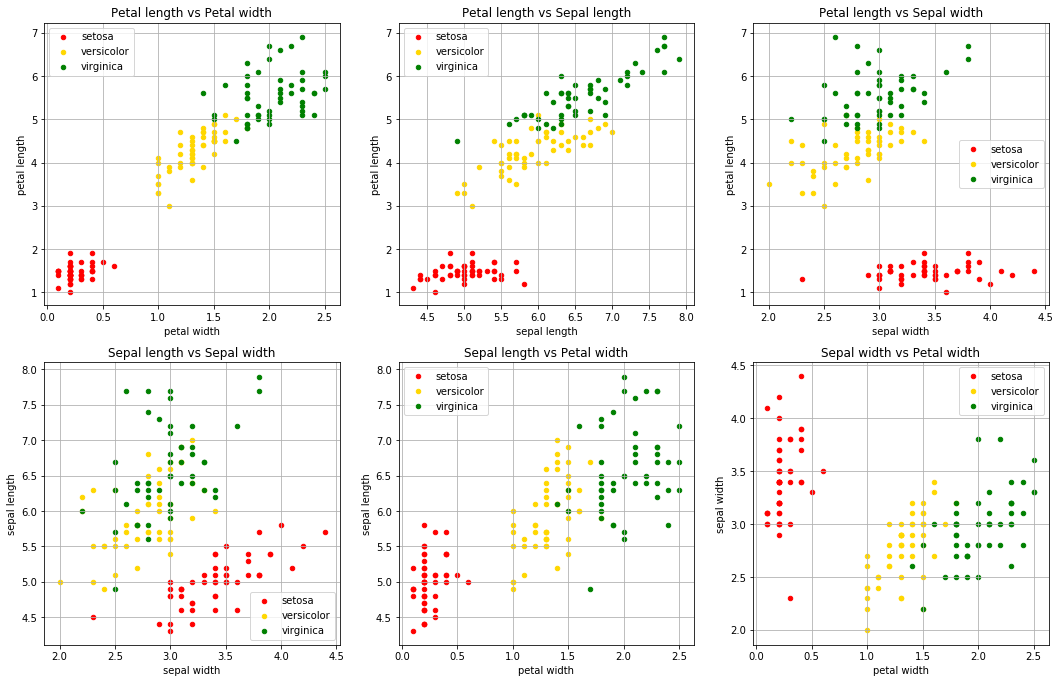

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,8))
fig.subplots_adjust(bottom=-0.2)

#Petal length vs Petal width
ax[0, 0].set_title("Petal length vs Petal width")
setosa.plot.scatter(x='petal width', y='petal length', grid=True, color='red', label='setosa', ax=ax[0, 0])
versicolor.plot.scatter(x='petal width', y='petal length', grid=True, color='gold', label='versicolor', ax=ax[0, 0])
virginica.plot.scatter(x='petal width', y='petal length', grid=True, color='green', label='virginica', ax=ax[0, 0])

#Petal length vs Sepal length
ax[0, 1].set_title("Petal length vs Sepal length")
setosa.plot.scatter(x='sepal length', y='petal length', grid=True, color='red', label='setosa', ax=ax[0, 1])
versicolor.plot.scatter(x='sepal length', y='petal length', grid=True, color='gold', label='versicolor', ax=ax[0,1])
virginica.plot.scatter(x='sepal length', y='petal length', grid=True, color='green', label='virginica', ax=ax[0,1])

#Petal length vs Sepal width
ax[0, 2].set_title("Petal length vs Sepal width")
setosa.plot.scatter(x='sepal width', y='petal length', grid=True, color='red', label='setosa', ax=ax[0, 2])
versicolor.plot.scatter(x='sepal width', y='petal length', grid=True, color='gold', label='versicolor', ax=ax[0,2])
virginica.plot.scatter(x='sepal width', y='petal length', grid=True, color='green', label='virginica', ax=ax[0,2])

#Sepal length vs Sepal width
ax[1, 0].set_title("Sepal length vs Sepal width")
setosa.plot.scatter(x='sepal width', y='sepal length', grid=True, color='red', label='setosa', ax=ax[1, 0])
versicolor.plot.scatter(x='sepal width', y='sepal length', grid=True, color='gold', label='versicolor', ax=ax[1, 0])
virginica.plot.scatter(x='sepal width', y='sepal length', grid=True, color='green', label='virginica', ax=ax[1, 0])


#Sepal length vs Petal width
ax[1, 1].set_title("Sepal length vs Petal width")
setosa.plot.scatter(x='petal width', y='sepal length', grid=True, color='red', label='setosa', ax=ax[1, 1])
versicolor.plot.scatter(x='petal width', y='sepal length', grid=True, color='gold', label='versicolor', ax=ax[1, 1])
virginica.plot.scatter(x='petal width', y='sepal length', grid=True, color='green', label='virginica', ax=ax[1, 1])

#Sepal width vs Petal width
ax[1, 2].set_title("Sepal width vs Petal width")
setosa.plot.scatter(x='petal width', y='sepal width', grid=True, color='red', label='setosa', ax=ax[1, 2])
versicolor.plot.scatter(x='petal width', y='sepal width', grid=True, color='gold', label='versicolor', ax=ax[1, 2])
virginica.plot.scatter(x='petal width', y='sepal width', grid=True, color='green', label='virginica', ax=ax[1, 2])

#Plotting decision boundaries
# x_sepal_width = np.linspace(np.min(df['sepal width']), np.max(df['sepal width']))
# x_petal_width = np.linspace(np.min(df['petal width']), np.max(df['petal width']))
# x_sepal_length = np.linspace(np.min(df['sepal length']), np.max(df['sepal length']))
# y_sepal_length = np.linspace(np.min(df['sepal length']), np.max(df['sepal length']))

# ax[0, 0].plot(x_petal_width, 0*x + 2.5, color='black')
# ax[0, 1].plot(x_sepal_length, 0*x + 2.5, color='black')
# ax[0, 2].plot(x_sepal_width, 0*x + 2.5, color='black')
# ax[1, 0].plot(x_sepal_width, 0.8*x + 2.8, color='black')
# ax[1, 1].plot(np.linspace(0, 1), -4*np.linspace(0, 1) + 8, color='black')
# ax[1, 2].plot((np.linspace(2.0, 4.5) - 0.5)/3, np.linspace(2.0, 4.5), color='black')

### Perceptron algorithm

In [5]:
class Perceptron:
    def __init__(self, inputs, outputs, learning_rate, num_epochs):
        self.train_inputs = inputs[:100]
        self.train_outputs = outputs[:100]
        self.test_inputs = inputs[100:]
        self.test_outputs = outputs[100:]
        self.lr = learning_rate
        self.num_epochs = num_epochs
        self.weights = np.random.rand(self.train_inputs.shape[-1])
        
    def predict(self, data):
        return int(self.weights.dot(data) > 0)
    
    def fit(self):
        print('Training the perceptron')
        print('-----------------------')
        for epoch in range(num_epochs):
            for i, data in enumerate(self.train_inputs):
                #Predict output
                y = self.predict(data)

                #If the prediction is correct
                if (self.train_outputs[i] == y):
                    continue


                if (self.train_outputs[i] == 1 and y == 0): #If misclassified point should be setosa
                    d = 1
                elif (self.train_outputs[i] == 0 and y == 1): #If misclassified point should be non-setosa
                    d = -1

                #Update the weights
                self.weights += (d * self.lr * data)

                print('Epoch: ', epoch+1, 'Step: ', i+1)
                print('Weights: ', self.weights)
        print('------------------------------------------')
        print('Perceptron training successfully completed\n')
        
    def test(self):
        correct = 0.0
        wrong = 0.0
        
        for i, data in enumerate(self.test_inputs):
            if (self.test_outputs[i] == self.predict(data)):
                correct += 1
            else:
                wrong += 1
                
        accuracy = correct/len(self.test_inputs) *100
        print('\n\nTesting the perceptron')
        print('-----------------------')
        print('Correctly classified: ', int(correct), '\tIncorrectly classified: ', int(wrong))
        print('Accuracy: ', accuracy, '%')

In [6]:
def prepare_train_data_for_classification(df, classification_type):
    # classification_type:
    # 1 - setosa vs non-setosa
    # 2 - virginica vs non-virginica
    # 3 - versicolor vs non-versicolor
    
    if(classification_type == 1):
        iris = 'Iris-setosa'
    elif(classification_type == 2):
        iris = 'Iris-virginica'
    elif(classification_type == 3):
        iris = 'Iris-versicolor'
    else:
        print('Enter appropriate classification type')
        return

    df['clamped'] = 1
    df['output'] = (df.variety == iris).astype(int)
    inputs = df[['sepal length', 'sepal width', 'petal length', 'petal width', 'clamped']].values
    outputs = df['output'].values
    
    return inputs, outputs

In [7]:
df = pd.read_csv('iris.data', encoding='utf-8', 
                     names=['sepal length', 'sepal width', 'petal length', 'petal width', 'variety'])
df = df.sample(frac=1).reset_index(drop=True)

#### Setosa vs Non-setosa

In [8]:
inputs, outputs = prepare_train_data_for_classification(df, 1)

#Set learning rate and number of epochs
lr = 1
num_epochs = 10

set_perceptron = Perceptron(inputs, outputs, lr, num_epochs)

#Training the perceptron
set_perceptron.fit()

#Testing the trained perceptron
set_perceptron.test()

Training the perceptron
-----------------------
Epoch:  1 Step:  1
Weights:  [-5.08439079 -2.27438916 -4.83756041 -1.61154631 -0.69248041]
Epoch:  1 Step:  5
Weights:  [ 0.61560921  2.12561084 -3.33756041 -1.21154631  0.30751959]
------------------------------------------
Perceptron training successfully completed



Testing the perceptron
-----------------------
Correctly classified:  50 	Incorrectly classified:  0
Accuracy:  100.0 %


#### Virginica vs non-virginica

In [9]:
inputs, outputs = prepare_train_data_for_classification(df, 2)

#Set learning rate and number of epochs
lr = 0.1
num_epochs = 50

vir_perceptron = Perceptron(inputs, outputs, lr, num_epochs)

#Training the perceptron
vir_perceptron.fit()

#Testing the trained perceptron
vir_perceptron.test()

Training the perceptron
-----------------------
Epoch:  1 Step:  5
Weights:  [ 0.3931343   0.55221801 -0.12002439  0.43424535  0.52069594]
Epoch:  1 Step:  6
Weights:  [-0.1868657   0.15221801 -0.24002439  0.41424535  0.42069594]
Epoch:  1 Step:  10
Weights:  [0.4631343  0.45221801 0.33997561 0.63424535 0.52069594]
Epoch:  1 Step:  14
Weights:  [-0.1468657   0.16221801 -0.13002439  0.49424535  0.42069594]
Epoch:  1 Step:  15
Weights:  [-0.6068657  -0.19778199 -0.23002439  0.47424535  0.32069594]
Epoch:  1 Step:  16
Weights:  [0.0831343  0.12221801 0.33997561 0.70424535 0.42069594]
Epoch:  1 Step:  18
Weights:  [-0.4868657  -0.25778199  0.16997561  0.67424535  0.32069594]
Epoch:  1 Step:  19
Weights:  [0.2231343  0.04221801 0.75997561 0.88424535 0.42069594]
Epoch:  1 Step:  20
Weights:  [-0.2768657  -0.30778199  0.62997561  0.85424535  0.32069594]
Epoch:  1 Step:  24
Weights:  [-0.9368657  -0.60778199  0.18997561  0.71424535  0.22069594]
Epoch:  1 Step:  25
Weights:  [-0.1468657  -0.227

Weights:  [-3.1968657  -1.87778199  3.80997561  3.73424535 -1.07930406]
Epoch:  11 Step:  13
Weights:  [-2.5068657  -1.56778199  4.31997561  3.96424535 -0.97930406]
Epoch:  11 Step:  14
Weights:  [-3.1168657  -1.85778199  3.84997561  3.82424535 -1.07930406]
Epoch:  11 Step:  25
Weights:  [-2.3268657  -1.47778199  4.48997561  4.02424535 -0.97930406]
Epoch:  11 Step:  26
Weights:  [-2.8368657  -1.72778199  4.18997561  3.91424535 -1.07930406]
Epoch:  11 Step:  27
Weights:  [-3.5068657  -2.03778199  3.71997561  3.76424535 -1.17930406]
Epoch:  11 Step:  32
Weights:  [-2.8568657  -1.71778199  4.22997561  3.96424535 -1.07930406]
Epoch:  11 Step:  33
Weights:  [-3.5068657  -1.99778199  3.76997561  3.81424535 -1.17930406]
Epoch:  11 Step:  35
Weights:  [-2.7368657  -1.69778199  4.37997561  4.04424535 -1.07930406]
Epoch:  11 Step:  36
Weights:  [-3.4268657  -2.00778199  3.88997561  3.89424535 -1.17930406]
Epoch:  11 Step:  48
Weights:  [-2.7068657  -1.70778199  4.46997561  4.05424535 -1.07930406

Epoch:  22 Step:  13
Weights:  [-3.7968657  -2.44778199  5.98997561  5.63424535 -1.97930406]
Epoch:  22 Step:  14
Weights:  [-4.4068657  -2.73778199  5.51997561  5.49424535 -2.07930406]
Epoch:  22 Step:  25
Weights:  [-3.6168657  -2.35778199  6.15997561  5.69424535 -1.97930406]
Epoch:  22 Step:  27
Weights:  [-4.2868657  -2.66778199  5.68997561  5.54424535 -2.07930406]
Epoch:  22 Step:  38
Weights:  [-4.8868657  -2.93778199  5.17997561  5.38424535 -2.17930406]
Epoch:  22 Step:  48
Weights:  [-4.1668657  -2.63778199  5.75997561  5.54424535 -2.07930406]
Epoch:  22 Step:  67
Weights:  [-4.7968657  -2.88778199  5.26997561  5.39424535 -2.17930406]
Epoch:  22 Step:  68
Weights:  [-4.0668657  -2.59778199  5.89997561  5.57424535 -2.07930406]
Epoch:  22 Step:  86
Weights:  [-4.6268657  -2.86778199  5.47997561  5.44424535 -2.17930406]
Epoch:  22 Step:  94
Weights:  [-3.9568657  -2.56778199  5.99997561  5.67424535 -2.07930406]
Epoch:  23 Step:  7
Weights:  [-4.5868657  -2.79778199  5.55997561  5.

Epoch:  34 Step:  67
Weights:  [-5.5268657  -3.49778199  6.14997561  6.41424535 -2.97930406]
Epoch:  34 Step:  68
Weights:  [-4.7968657  -3.20778199  6.77997561  6.59424535 -2.87930406]
Epoch:  35 Step:  28
Weights:  [-5.4668657  -3.50778199  6.27997561  6.42424535 -2.97930406]
Epoch:  35 Step:  32
Weights:  [-4.8168657  -3.18778199  6.78997561  6.62424535 -2.87930406]
Epoch:  35 Step:  38
Weights:  [-5.4168657  -3.45778199  6.27997561  6.46424535 -2.97930406]
Epoch:  35 Step:  48
Weights:  [-4.6968657  -3.15778199  6.85997561  6.62424535 -2.87930406]
Epoch:  35 Step:  56
Weights:  [-5.2668657  -3.43778199  6.40997561  6.49424535 -2.97930406]
Epoch:  35 Step:  63
Weights:  [-4.6568657  -3.13778199  6.89997561  6.67424535 -2.87930406]
Epoch:  35 Step:  64
Weights:  [-5.2668657  -3.43778199  6.43997561  6.53424535 -2.97930406]
Epoch:  35 Step:  94
Weights:  [-4.5968657  -3.13778199  6.95997561  6.76424535 -2.87930406]
Epoch:  36 Step:  7
Weights:  [-5.2268657  -3.36778199  6.51997561  6.

#### Versicolor vs non-versicolor

In [10]:
inputs, outputs = prepare_train_data_for_classification(df, 3)

#Set learning rate and number of epochs
lr = 0.1
num_epochs = 50

perceptron = Perceptron(inputs, outputs, lr, num_epochs)

#Training the perceptron
perceptron.fit()

#Testing the trained perceptron
perceptron.test()

Training the perceptron
-----------------------
Epoch:  1 Step:  1
Weights:  [-0.21142923  0.6271747  -0.07855947  0.71141124  0.78791987]
Epoch:  1 Step:  2
Weights:  [-0.81142923  0.4071747  -0.57855947  0.56141124  0.68791987]
Epoch:  1 Step:  7
Weights:  [-0.18142923  0.6371747  -0.13855947  0.69141124  0.78791987]
Epoch:  1 Step:  8
Weights:  [-0.67142923  0.3271747  -0.28855947  0.68141124  0.68791987]
Epoch:  1 Step:  9
Weights:  [-0.09142923  0.5971747   0.10144053  0.80141124  0.78791987]
Epoch:  1 Step:  10
Weights:  [-0.74142923  0.2971747  -0.47855947  0.58141124  0.68791987]
Epoch:  1 Step:  14
Weights:  [-0.13142923  0.5871747  -0.00855947  0.72141124  0.78791987]
Epoch:  1 Step:  15
Weights:  [-0.59142923  0.2271747  -0.10855947  0.70141124  0.68791987]
Epoch:  1 Step:  24
Weights:  [0.06857077 0.5271747  0.33144053 0.84141124 0.78791987]
Epoch:  1 Step:  25
Weights:  [-0.72142923  0.1471747  -0.30855947  0.64141124  0.68791987]
Epoch:  1 Step:  26
Weights:  [-0.21142923

Epoch:  4 Step:  29
Weights:  [ 0.38857077 -1.6428253   0.21144053 -0.36858876  0.98791987]
Epoch:  4 Step:  30
Weights:  [ 0.93857077 -1.3828253   0.65144053 -0.24858876  1.08791987]
Epoch:  4 Step:  32
Weights:  [ 0.28857077 -1.7028253   0.14144053 -0.44858876  0.98791987]
Epoch:  4 Step:  33
Weights:  [ 0.93857077 -1.4228253   0.60144053 -0.29858876  1.08791987]
Epoch:  4 Step:  34
Weights:  [ 0.45857077 -1.7228253   0.46144053 -0.30858876  0.98791987]
Epoch:  4 Step:  35
Weights:  [-0.31142923 -2.0228253  -0.14855947 -0.53858876  0.88791987]
Epoch:  4 Step:  36
Weights:  [ 0.37857077 -1.7128253   0.34144053 -0.38858876  0.98791987]
Epoch:  4 Step:  38
Weights:  [ 0.97857077 -1.4428253   0.85144053 -0.22858876  1.08791987]
Epoch:  4 Step:  39
Weights:  [ 0.44857077 -1.8128253   0.70144053 -0.24858876  0.98791987]
Epoch:  4 Step:  48
Weights:  [-0.27142923 -2.1128253   0.12144053 -0.40858876  0.88791987]
Epoch:  4 Step:  49
Weights:  [ 0.38857077 -1.8228253   0.58144053 -0.27858876  

Weights:  [ 1.87857077 -3.0628253   0.32144053 -1.78858876  1.48791987]
Epoch:  8 Step:  34
Weights:  [ 1.39857077 -3.3628253   0.18144053 -1.79858876  1.38791987]
Epoch:  8 Step:  36
Weights:  [ 2.08857077 -3.0528253   0.67144053 -1.64858876  1.48791987]
Epoch:  8 Step:  37
Weights:  [ 1.45857077 -3.3428253   0.11144053 -1.82858876  1.38791987]
Epoch:  8 Step:  38
Weights:  [ 2.05857077 -3.0728253   0.62144053 -1.66858876  1.48791987]
Epoch:  8 Step:  39
Weights:  [ 1.52857077 -3.4428253   0.47144053 -1.68858876  1.38791987]
Epoch:  8 Step:  41
Weights:  [ 2.09857077 -3.1528253   0.89144053 -1.55858876  1.48791987]
Epoch:  8 Step:  46
Weights:  [ 1.57857077 -3.5628253   0.74144053 -1.56858876  1.38791987]
Epoch:  8 Step:  48
Weights:  [ 0.85857077 -3.8628253   0.16144053 -1.72858876  1.28791987]
Epoch:  8 Step:  49
Weights:  [ 1.51857077 -3.5728253   0.62144053 -1.59858876  1.38791987]
Epoch:  8 Step:  50
Weights:  [ 0.86857077 -3.8728253   0.10144053 -1.79858876  1.28791987]
Epoch:  

Epoch:  12 Step:  74
Weights:  [ 2.05857077 -4.6428253   0.33144053 -2.69858876  1.68791987]
Epoch:  12 Step:  75
Weights:  [ 2.64857077 -4.3428253   0.75144053 -2.54858876  1.78791987]
Epoch:  12 Step:  76
Weights:  [ 2.15857077 -4.5928253   0.30144053 -2.71858876  1.68791987]
Epoch:  12 Step:  86
Weights:  [ 2.71857077 -4.3228253   0.72144053 -2.58858876  1.78791987]
Epoch:  12 Step:  88
Weights:  [ 1.95857077 -4.6228253   0.06144053 -2.79858876  1.68791987]
Epoch:  12 Step:  90
Weights:  [ 2.52857077 -4.3628253   0.41144053 -2.69858876  1.78791987]
Epoch:  12 Step:  92
Weights:  [ 1.94857077 -4.6328253  -0.09855947 -2.88858876  1.68791987]
Epoch:  12 Step:  97
Weights:  [ 2.52857077 -4.3628253   0.31144053 -2.78858876  1.78791987]
Epoch:  12 Step:  99
Weights:  [ 1.85857077 -4.6728253  -0.24855947 -3.02858876  1.68791987]
Epoch:  13 Step:  7
Weights:  [ 2.48857077 -4.4428253   0.19144053 -2.89858876  1.78791987]
Epoch:  13 Step:  8
Weights:  [ 1.99857077 -4.7528253   0.04144053 -2.9

Epoch:  16 Step:  41
Weights:  [ 3.35857077 -5.2728253   1.01144053 -3.43858876  1.98791987]
Epoch:  16 Step:  47
Weights:  [ 2.81857077 -5.6128253   0.86144053 -3.47858876  1.88791987]
Epoch:  16 Step:  48
Weights:  [ 2.09857077 -5.9128253   0.28144053 -3.63858876  1.78791987]
Epoch:  16 Step:  49
Weights:  [ 2.75857077 -5.6228253   0.74144053 -3.50858876  1.88791987]
Epoch:  16 Step:  68
Weights:  [ 2.02857077 -5.9128253   0.11144053 -3.68858876  1.78791987]
Epoch:  16 Step:  74
Weights:  [ 2.59857077 -5.6128253   0.53144053 -3.56858876  1.88791987]
Epoch:  16 Step:  75
Weights:  [ 3.18857077 -5.3128253   0.95144053 -3.41858876  1.98791987]
Epoch:  16 Step:  76
Weights:  [ 2.69857077 -5.5628253   0.50144053 -3.58858876  1.88791987]
Epoch:  16 Step:  86
Weights:  [ 3.25857077 -5.2928253   0.92144053 -3.45858876  1.98791987]
Epoch:  16 Step:  88
Weights:  [ 2.49857077 -5.5928253   0.26144053 -3.66858876  1.88791987]
Epoch:  16 Step:  90
Weights:  [ 3.06857077 -5.3328253   0.61144053 -3

Weights:  [ 3.46857077 -5.9828253   1.43144053 -4.01858876  2.28791987]
Epoch:  20 Step:  76
Weights:  [ 2.97857077 -6.2328253   0.98144053 -4.18858876  2.18791987]
Epoch:  20 Step:  77
Weights:  [ 2.33857077 -6.5128253   0.42144053 -4.40858876  2.08791987]
Epoch:  20 Step:  84
Weights:  [ 2.89857077 -6.2628253   0.81144053 -4.29858876  2.18791987]
Epoch:  20 Step:  86
Weights:  [ 3.45857077 -5.9928253   1.23144053 -4.16858876  2.28791987]
Epoch:  20 Step:  88
Weights:  [ 2.69857077 -6.2928253   0.57144053 -4.37858876  2.18791987]
Epoch:  20 Step:  90
Weights:  [ 3.26857077 -6.0328253   0.92144053 -4.27858876  2.28791987]
Epoch:  20 Step:  92
Weights:  [ 2.68857077 -6.3028253   0.41144053 -4.46858876  2.18791987]
Epoch:  20 Step:  97
Weights:  [ 3.26857077 -6.0328253   0.82144053 -4.36858876  2.28791987]
Epoch:  20 Step:  100
Weights:  [ 2.58857077 -6.3328253   0.27144053 -4.57858876  2.18791987]
Epoch:  21 Step:  7
Weights:  [ 3.21857077 -6.1028253   0.71144053 -4.44858876  2.28791987

Epoch:  24 Step:  14
Weights:  [ 2.95857077 -6.4728253   1.04144053 -4.89858876  2.28791987]
Epoch:  24 Step:  22
Weights:  [ 2.32857077 -6.7228253   0.54144053 -5.08858876  2.18791987]
Epoch:  24 Step:  24
Weights:  [ 2.98857077 -6.4228253   0.98144053 -4.94858876  2.28791987]
Epoch:  24 Step:  26
Weights:  [ 3.49857077 -6.1728253   1.28144053 -4.83858876  2.38791987]
Epoch:  24 Step:  32
Weights:  [ 2.84857077 -6.4928253   0.77144053 -5.03858876  2.28791987]
Epoch:  24 Step:  33
Weights:  [ 3.49857077 -6.2128253   1.23144053 -4.88858876  2.38791987]
Epoch:  24 Step:  34
Weights:  [ 3.01857077 -6.5128253   1.09144053 -4.89858876  2.28791987]
Epoch:  24 Step:  35
Weights:  [ 2.24857077 -6.8128253   0.48144053 -5.12858876  2.18791987]
Epoch:  24 Step:  36
Weights:  [ 2.93857077 -6.5028253   0.97144053 -4.97858876  2.28791987]
Epoch:  24 Step:  38
Weights:  [ 3.53857077 -6.2328253   1.48144053 -4.81858876  2.38791987]
Epoch:  24 Step:  47
Weights:  [ 2.99857077 -6.5728253   1.33144053 -4

Epoch:  28 Step:  7
Weights:  [ 3.28857077 -6.7328253   1.22144053 -5.59858876  2.48791987]
Epoch:  28 Step:  11
Weights:  [ 2.64857077 -7.0028253   0.69144053 -5.78858876  2.38791987]
Epoch:  28 Step:  14
Weights:  [ 3.25857077 -6.7128253   1.16144053 -5.64858876  2.48791987]
Epoch:  28 Step:  19
Weights:  [ 2.54857077 -7.0128253   0.57144053 -5.85858876  2.38791987]
Epoch:  28 Step:  24
Weights:  [ 3.20857077 -6.7128253   1.01144053 -5.71858876  2.48791987]
Epoch:  28 Step:  26
Weights:  [ 3.71857077 -6.4628253   1.31144053 -5.60858876  2.58791987]
Epoch:  28 Step:  32
Weights:  [ 3.06857077 -6.7828253   0.80144053 -5.80858876  2.48791987]
Epoch:  28 Step:  33
Weights:  [ 3.71857077 -6.5028253   1.26144053 -5.65858876  2.58791987]
Epoch:  28 Step:  34
Weights:  [ 3.23857077 -6.8028253   1.12144053 -5.66858876  2.48791987]
Epoch:  28 Step:  35
Weights:  [ 2.46857077 -7.1028253   0.51144053 -5.89858876  2.38791987]
Epoch:  28 Step:  36
Weights:  [ 3.15857077 -6.7928253   1.00144053 -5.

Weights:  [ 2.85857077 -7.4628253   0.97144053 -6.89858876  2.68791987]
Epoch:  35 Step:  14
Weights:  [ 3.46857077 -7.1728253   1.44144053 -6.75858876  2.78791987]
Epoch:  35 Step:  19
Weights:  [ 2.75857077 -7.4728253   0.85144053 -6.96858876  2.68791987]
Epoch:  35 Step:  24
Weights:  [ 3.41857077 -7.1728253   1.29144053 -6.82858876  2.78791987]
Epoch:  35 Step:  26
Weights:  [ 3.92857077 -6.9228253   1.59144053 -6.71858876  2.88791987]
Epoch:  35 Step:  32
Weights:  [ 3.27857077 -7.2428253   1.08144053 -6.91858876  2.78791987]
Epoch:  35 Step:  33
Weights:  [ 3.92857077 -6.9628253   1.54144053 -6.76858876  2.88791987]
Epoch:  35 Step:  34
Weights:  [ 3.44857077 -7.2628253   1.40144053 -6.77858876  2.78791987]
Epoch:  35 Step:  35
Weights:  [ 2.67857077 -7.5628253   0.79144053 -7.00858876  2.68791987]
Epoch:  35 Step:  36
Weights:  [ 3.36857077 -7.2528253   1.28144053 -6.85858876  2.78791987]
Epoch:  35 Step:  38
Weights:  [ 3.96857077 -6.9828253   1.79144053 -6.69858876  2.88791987

Epoch:  41 Step:  26
Weights:  [ 4.04857077 -7.2028253   1.81144053 -7.48858876  3.08791987]
Epoch:  41 Step:  32
Weights:  [ 3.39857077 -7.5228253   1.30144053 -7.68858876  2.98791987]
Epoch:  41 Step:  33
Weights:  [ 4.04857077 -7.2428253   1.76144053 -7.53858876  3.08791987]
Epoch:  41 Step:  34
Weights:  [ 3.56857077 -7.5428253   1.62144053 -7.54858876  2.98791987]
Epoch:  41 Step:  35
Weights:  [ 2.79857077 -7.8428253   1.01144053 -7.77858876  2.88791987]
Epoch:  41 Step:  36
Weights:  [ 3.48857077 -7.5328253   1.50144053 -7.62858876  2.98791987]
Epoch:  41 Step:  38
Weights:  [ 4.08857077 -7.2628253   2.01144053 -7.46858876  3.08791987]
Epoch:  41 Step:  47
Weights:  [ 3.54857077 -7.6028253   1.86144053 -7.50858876  2.98791987]
Epoch:  41 Step:  48
Weights:  [ 2.82857077 -7.9028253   1.28144053 -7.66858876  2.88791987]
Epoch:  41 Step:  49
Weights:  [ 3.48857077 -7.6128253   1.74144053 -7.53858876  2.98791987]
Epoch:  41 Step:  56
Weights:  [ 4.05857077 -7.3328253   2.19144053 -7

Epoch:  47 Step:  75
Weights:  [ 4.01857077 -7.4928253   2.54144053 -8.00858876  3.18791987]
Epoch:  47 Step:  76
Weights:  [ 3.52857077 -7.7428253   2.09144053 -8.17858876  3.08791987]
Epoch:  47 Step:  87
Weights:  [ 4.16857077 -7.4228253   2.54144053 -8.02858876  3.18791987]
Epoch:  47 Step:  88
Weights:  [ 3.40857077 -7.7228253   1.88144053 -8.23858876  3.08791987]
Epoch:  47 Step:  96
Weights:  [ 2.95857077 -7.9528253   1.75144053 -8.26858876  2.98791987]
Epoch:  47 Step:  97
Weights:  [ 3.53857077 -7.6828253   2.16144053 -8.16858876  3.08791987]
Epoch:  48 Step:  2
Weights:  [ 2.93857077 -7.9028253   1.66144053 -8.31858876  2.98791987]
Epoch:  48 Step:  7
Weights:  [ 3.56857077 -7.6728253   2.10144053 -8.18858876  3.08791987]
Epoch:  48 Step:  11
Weights:  [ 2.92857077 -7.9428253   1.57144053 -8.37858876  2.98791987]
Epoch:  48 Step:  14
Weights:  [ 3.53857077 -7.6528253   2.04144053 -8.23858876  3.08791987]
Epoch:  48 Step:  22
Weights:  [ 2.90857077 -7.9028253   1.54144053 -8.4

### Neural Network for iris classification (4 inputs, 3 outputs)

In [11]:
def predict_iris(sl, sw, pl, pw):
    #Input neurons
    inputs = [sl, sw, pl, pw, 1]
    
    #Hidden neurons
    set_hidden = set_perceptron.predict(inputs) #pre-trained setosa vs non-setosa perceptron
    vir_hidden = vir_perceptron.predict(inputs) #pre-trained virginica vs virginica perceptron
    
    #Output neurons
    ver_out = int(np.array([-1., -1., 0.5]).dot([set_hidden, vir_hidden, 1]) > 0)
    set_out = int(np.array([1., 0., -0.5]).dot([set_hidden, vir_hidden, 1]) > 0)
    vir_out = int(np.array([0., 1., -0.5]).dot([set_hidden, vir_hidden, 1]) > 0)
    
    return ver_out, set_out, vir_out

#### Predict the iris

In [12]:
#Set the input values
SL = 2.5 #Sepal length
SW = 2.5 #Sepal width
PL = 1.6 #Petal length
PW = 1.5 #Petal width

output = predict_iris(SL, SW, PL, PW)

if output[0]:
    print(output, 'This is an Iris-versicolor')
elif output[1]:
    print(output, 'This is an Iris-setosa')
elif output[2]:
    print(output, 'This is an Iris-virginica')

(0, 1, 0) This is an Iris-setosa


#### Network evaluation

In [13]:
inputs = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
inputs = inputs[100:].values #Test set inputs
outputs = df['variety']
outputs = outputs[100:].reset_index(drop=True) #Test set outputs

correct = 0.0
wrong = 0.0

for i, data in enumerate(inputs):
    pred = predict_iris(*data)
    
    if pred[0] and outputs[i] == 'Iris-versicolor':
        correct += 1
    elif pred[1] and outputs[i] == 'Iris-setosa':
        correct += 1
    elif pred[2] and outputs[i] == 'Iris-virginica':
        correct += 1
    else:
        wrong += 1
        
accuracy = correct/len(inputs) * 100
print('Accuracy: ', accuracy, '%')

Accuracy:  94.0 %


### Building neural network with Keras

#### Prepare data

In [14]:
inputs  = []
outputs = []

d = {}
d['Iris-setosa\n']     = [1., 0., 0.]
d['Iris-versicolor\n'] = [0., 1., 0.]
d['Iris-virginica\n']  = [0., 0., 1.]

with open('iris.data') as f:
    lines=f.readlines()
    for line in lines:
        items=line.split(',')
        if len(items) == 5:
            inp =  [float(x) for x in items[0:4] ]
            inputs.append(inp)
            out = d[items[4]]
            outputs.append(out)
            
print( len(inputs), 'input patterns', len(outputs), 'output patterns')

150 input patterns 150 output patterns


#### Build neural network

In [25]:
model = tf.keras.Sequential()
# an mlp with a given number of input nodes. Four input nodes, three output nodes 
nr_hidden = 6
nr_out    = 3 

model.add(layers.Dense(nr_hidden, activation = 'relu'))
model.add(layers.Dense(nr_out,activation='softmax'))
model.compile(optimizer=tf.keras.optimizers.SGD(0.05, 0.9),loss='categorical_crossentropy', metrics=['accuracy'])

#### Split data into training and test sets

In [16]:
ids=random.sample(range(0,len(inputs)), 100) # generate 100 random ids
train_in = []
train_out=[]
for id in ids:
    train_in.append(inputs[id])
    train_out.append(outputs[id])
train_inputs  = np.array(train_in)
train_outputs = np.array(train_out)

val_input =[]
val_output=[]
validation_ids = list(set(range(0,len(inputs))) - set(ids))
for val_id in validation_ids:
    val_input.append(inputs[val_id])
    val_output.append(outputs[val_id])
val_inputs  = np.array(val_input)
val_outputs = np.array(val_output)

In [26]:
history = model.fit(train_inputs,train_outputs,validation_data=(val_inputs, val_outputs), epochs=1000,batch_size=30)

Train on 100 samples, validate on 50 samples
Epoch 1/1000
100/100 [==============================] - 1s 6ms/sample - loss: 1.1331 - accuracy: 0.4000 - val_loss: 0.9129 - val_accuracy: 0.6400
Epoch 2/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.8097 - accuracy: 0.6800 - val_loss: 0.7286 - val_accuracy: 0.8600
Epoch 3/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.6508 - accuracy: 0.8600 - val_loss: 0.5348 - val_accuracy: 0.9200
Epoch 4/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.4945 - accuracy: 0.7900 - val_loss: 0.3636 - val_accuracy: 0.8600
Epoch 5/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.3737 - accuracy: 0.8600 - val_loss: 0.9314 - val_accuracy: 0.6400
Epoch 6/1000
100/100 [==============================] - 0s 229us/sample - loss: 1.0219 - accuracy: 0.7200 - val_loss: 1.2019 - val_accuracy: 0.6000
Epoch 7/1000
100/100 [==============================] - 0s 209us/samp

Epoch 56/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.0857 - accuracy: 0.9700 - val_loss: 0.0429 - val_accuracy: 1.0000
Epoch 57/1000
100/100 [==============================] - 0s 289us/sample - loss: 0.0947 - accuracy: 0.9700 - val_loss: 0.1148 - val_accuracy: 0.9400
Epoch 58/1000
100/100 [==============================] - 0s 269us/sample - loss: 0.1081 - accuracy: 0.9600 - val_loss: 0.0425 - val_accuracy: 1.0000
Epoch 59/1000
100/100 [==============================] - 0s 269us/sample - loss: 0.0997 - accuracy: 0.9700 - val_loss: 0.0276 - val_accuracy: 1.0000
Epoch 60/1000
100/100 [==============================] - 0s 289us/sample - loss: 0.1197 - accuracy: 0.9600 - val_loss: 0.1401 - val_accuracy: 0.9200
Epoch 61/1000
100/100 [==============================] - 0s 309us/sample - loss: 0.1423 - accuracy: 0.9500 - val_loss: 0.0233 - val_accuracy: 1.0000
Epoch 62/1000
100/100 [==============================] - 0s 309us/sample - loss: 0.1415 - accuracy: 0.9300

Epoch 111/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.4595 - accuracy: 0.7800 - val_loss: 0.1028 - val_accuracy: 0.9800
Epoch 112/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.3907 - accuracy: 0.8700 - val_loss: 0.1516 - val_accuracy: 0.9200
Epoch 113/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.4175 - accuracy: 0.7900 - val_loss: 0.0571 - val_accuracy: 0.9800
Epoch 114/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.1706 - accuracy: 0.9400 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 115/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.0815 - accuracy: 0.9600 - val_loss: 0.0508 - val_accuracy: 0.9600
Epoch 116/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.1027 - accuracy: 0.9600 - val_loss: 0.0554 - val_accuracy: 0.9600
Epoch 117/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1263 - accuracy:

100/100 [==============================] - 0s 359us/sample - loss: 0.1039 - accuracy: 0.9600 - val_loss: 0.0358 - val_accuracy: 1.0000
Epoch 220/1000
100/100 [==============================] - 0s 249us/sample - loss: 0.1302 - accuracy: 0.9400 - val_loss: 0.0497 - val_accuracy: 0.9800
Epoch 221/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.1374 - accuracy: 0.9400 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 222/1000
100/100 [==============================] - 0s 249us/sample - loss: 0.1024 - accuracy: 0.9500 - val_loss: 0.0464 - val_accuracy: 1.0000
Epoch 223/1000
100/100 [==============================] - 0s 289us/sample - loss: 0.1006 - accuracy: 0.9600 - val_loss: 0.0732 - val_accuracy: 0.9600
Epoch 224/1000
100/100 [==============================] - 0s 289us/sample - loss: 0.0608 - accuracy: 0.9700 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 225/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.1122 - accuracy: 0.9500 - val_l

Epoch 274/1000
100/100 [==============================] - 0s 499us/sample - loss: 0.0657 - accuracy: 0.9700 - val_loss: 0.1146 - val_accuracy: 0.9400
Epoch 275/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.0978 - accuracy: 0.9600 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 276/1000
100/100 [==============================] - 0s 309us/sample - loss: 0.0731 - accuracy: 0.9700 - val_loss: 0.0444 - val_accuracy: 0.9800
Epoch 277/1000
100/100 [==============================] - 0s 259us/sample - loss: 0.0714 - accuracy: 0.9700 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 278/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0774 - accuracy: 0.9800 - val_loss: 0.0346 - val_accuracy: 1.0000
Epoch 279/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.0875 - accuracy: 0.9700 - val_loss: 0.0766 - val_accuracy: 0.9400
Epoch 280/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0867 - accuracy:

Epoch 383/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.0677 - accuracy: 0.9700 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 384/1000
100/100 [==============================] - 0s 259us/sample - loss: 0.0655 - accuracy: 0.9800 - val_loss: 0.0350 - val_accuracy: 1.0000
Epoch 385/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.0274 - val_accuracy: 1.0000
Epoch 386/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0665 - accuracy: 0.9800 - val_loss: 0.0322 - val_accuracy: 1.0000
Epoch 387/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.0627 - accuracy: 0.9800 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 388/1000
100/100 [==============================] - 0s 200us/sample - loss: 0.0793 - accuracy: 0.9700 - val_loss: 0.0385 - val_accuracy: 0.9800
Epoch 389/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.1575 - accuracy:

Epoch 492/1000
100/100 [==============================] - 0s 250us/sample - loss: 0.0871 - accuracy: 0.9700 - val_loss: 0.0641 - val_accuracy: 0.9600
Epoch 493/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.0864 - accuracy: 0.9600 - val_loss: 0.0272 - val_accuracy: 1.0000
Epoch 494/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.0688 - accuracy: 0.9600 - val_loss: 0.0679 - val_accuracy: 0.9600
Epoch 495/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.0601 - accuracy: 0.9700 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 496/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.0821 - accuracy: 0.9700 - val_loss: 0.0340 - val_accuracy: 1.0000
Epoch 497/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.0760 - accuracy: 0.9600 - val_loss: 0.1002 - val_accuracy: 0.9400
Epoch 498/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.0698 - accuracy:

100/100 [==============================] - 0s 219us/sample - loss: 0.1452 - accuracy: 0.9400 - val_loss: 0.1662 - val_accuracy: 0.9200
Epoch 601/1000
100/100 [==============================] - 0s 279us/sample - loss: 0.1688 - accuracy: 0.9200 - val_loss: 0.0412 - val_accuracy: 0.9800
Epoch 602/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.0754 - accuracy: 0.9800 - val_loss: 0.0165 - val_accuracy: 1.0000
Epoch 603/1000
100/100 [==============================] - 0s 269us/sample - loss: 0.1612 - accuracy: 0.9500 - val_loss: 0.0833 - val_accuracy: 0.9400
Epoch 604/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.0867 - accuracy: 0.9600 - val_loss: 0.0451 - val_accuracy: 0.9800
Epoch 605/1000
100/100 [==============================] - 0s 279us/sample - loss: 0.0993 - accuracy: 0.9600 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 606/1000
100/100 [==============================] - 0s 259us/sample - loss: 0.0906 - accuracy: 0.9500 - val_l

Epoch 655/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.0967 - accuracy: 0.9600 - val_loss: 0.0603 - val_accuracy: 0.9600
Epoch 656/1000
100/100 [==============================] - ETA: 0s - loss: 0.0680 - accuracy: 0.96 - 0s 209us/sample - loss: 0.0513 - accuracy: 0.9800 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 657/1000
100/100 [==============================] - 0s 249us/sample - loss: 0.1154 - accuracy: 0.9600 - val_loss: 0.0175 - val_accuracy: 1.0000
Epoch 658/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.0564 - accuracy: 0.9800 - val_loss: 0.0632 - val_accuracy: 0.9600
Epoch 659/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0634 - accuracy: 0.9700 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 660/1000
100/100 [==============================] - 0s 249us/sample - loss: 0.0747 - accuracy: 0.9700 - val_loss: 0.0140 - val_accuracy: 1.0000
Epoch 661/1000
100/100 [==============================] - 

Epoch 764/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.0855 - accuracy: 0.9600 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 765/1000
100/100 [==============================] - 0s 249us/sample - loss: 0.0860 - accuracy: 0.9500 - val_loss: 0.0450 - val_accuracy: 0.9600
Epoch 766/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0508 - accuracy: 0.9800 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 767/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0819 - accuracy: 0.9700 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 768/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.0525 - val_accuracy: 0.9600
Epoch 769/1000
100/100 [==============================] - 0s 190us/sample - loss: 0.0697 - accuracy: 0.9700 - val_loss: 0.0262 - val_accuracy: 1.0000
Epoch 770/1000
100/100 [==============================] - 0s 289us/sample - loss: 0.0681 - accuracy:

Epoch 873/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.0624 - accuracy: 0.9700 - val_loss: 0.0344 - val_accuracy: 0.9800
Epoch 874/1000
100/100 [==============================] - 0s 180us/sample - loss: 0.0568 - accuracy: 0.9800 - val_loss: 0.0412 - val_accuracy: 0.9800
Epoch 875/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.0644 - accuracy: 0.9700 - val_loss: 0.0226 - val_accuracy: 1.0000
Epoch 876/1000
100/100 [==============================] - 0s 239us/sample - loss: 0.0699 - accuracy: 0.9800 - val_loss: 0.0144 - val_accuracy: 1.0000
Epoch 877/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.0731 - accuracy: 0.9700 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 878/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0912 - accuracy: 0.9600 - val_loss: 0.0207 - val_accuracy: 1.0000
Epoch 879/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.0937 - accuracy:

Epoch 982/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.1332 - accuracy: 0.9500 - val_loss: 0.2044 - val_accuracy: 0.9200
Epoch 983/1000
100/100 [==============================] - 0s 219us/sample - loss: 0.1310 - accuracy: 0.9500 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 984/1000
100/100 [==============================] - 0s 189us/sample - loss: 0.1079 - accuracy: 0.9700 - val_loss: 0.0434 - val_accuracy: 0.9800
Epoch 985/1000
100/100 [==============================] - 0s 209us/sample - loss: 0.0709 - accuracy: 0.9600 - val_loss: 0.0680 - val_accuracy: 0.9600
Epoch 986/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.0515 - accuracy: 0.9800 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 987/1000
100/100 [==============================] - 0s 229us/sample - loss: 0.0749 - accuracy: 0.9700 - val_loss: 0.0208 - val_accuracy: 1.0000
Epoch 988/1000
100/100 [==============================] - 0s 199us/sample - loss: 0.0801 - accuracy:

In [18]:
test_loss, test_accuracy = model.evaluate(val_inputs, val_outputs)
print('Test Loss: %.3f, Test accuracy: %.3f' % (test_loss, test_accuracy))

50/50 [==============================] - 0s 160us/sample - loss: 1.1058 - accuracy: 0.2800
Test Loss: 1.106, Test accuracy: 0.280


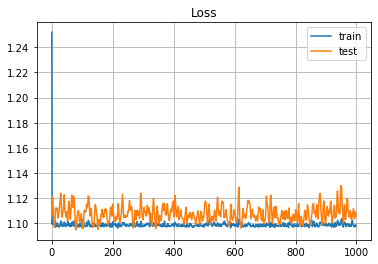

In [19]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.grid()
plt.show()

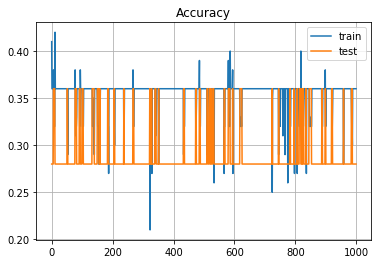

In [20]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.grid()
plt.show()

In [21]:
preds = model.predict(val_input)
preds[:5]

array([[0.33647555, 0.30768162, 0.3558429 ],
       [0.33647555, 0.30768162, 0.3558429 ],
       [0.33647555, 0.30768162, 0.3558429 ],
       [0.33647555, 0.30768162, 0.3558429 ],
       [0.33647555, 0.30768162, 0.3558429 ]], dtype=float32)

In [22]:
val_outputs[:5]

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])